# **OPEN UNIVERSITY LEARNING ANALYTICS DATASET ANALYSIS**

The Open University Learning Analytics Dataset (OULAD) contains anonymized data on students enrolled in online courses offered by the Open University. The dataset is composed of multiple interconnected tables that capture student demographics, academic performance, course structure, and online learning behavior. It includes information such as student registration and withdrawal dates, assessment details and scores, final results, prior educational background, and interaction logs from the Virtual Learning Environment (VLE). Together, these components provide a comprehensive view of student engagement and progression throughout online modules, enabling analysis of learning behavior, performance patterns, and factors influencing student success and withdrawal.

# DATA LOADING AND INITIAL SETUP



In [105]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Load datasets
studentregistration = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentRegistration.csv')
studentinfo = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentInfo.csv')
studentvle = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentVle.csv')
studentassessment = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentAssessment.csv')
courses = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/courses.csv')
vle = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/vle.csv')
assessments = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/assessments.csv')

# INITIAL DATA INSPECTION & DATA UNDERSTANDING

In [108]:
print("studentRegistration Columns:")
print(studentregistration.columns.tolist(), "\n")

print("studentInfo Columns:")
print(studentinfo.columns.tolist(), "\n")

print("studentVle Columns:")
print(studentvle.columns.tolist(), "\n")

print("studentAssessment Columns:")
print(studentassessment.columns.tolist(), "\n")

print("courses Columns:")
print(courses.columns.tolist(), "\n")

print("vle columns:")
print(vle.columns.tolist(), "\n")

print("assessments columns:")
print(assessments.columns.tolist())

studentRegistration Columns:
['code_module', 'code_presentation', 'id_student', 'date_registration', 'date_unregistration'] 

studentInfo Columns:
['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result'] 

studentVle Columns:
['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click'] 

studentAssessment Columns:
['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'] 

courses Columns:
['code_module', 'code_presentation', 'module_presentation_length'] 

vle columns:
['id_site', 'code_module', 'code_presentation', 'activity_type', 'week_from', 'week_to'] 

assessments columns:
['code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'weight']


In [109]:
studentregistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [110]:
studentregistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [111]:
studentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [112]:
studentinfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [113]:
studentvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [114]:
studentvle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [115]:
studentassessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [116]:
studentassessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [117]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [118]:
courses.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


In [119]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [120]:
vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [121]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [122]:
assessments.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


# DATA PREPARATION & HANDLING MISSING VALUES


In [123]:
print("studentregistration:", studentregistration.shape)
print("studentinfo:", studentinfo.shape)
print("studentvle:", studentvle.shape)
print("studentassessment:", studentassessment.shape)
print("courses:", courses.shape)
print("vle:", vle.shape)
print("assessments:", assessments.shape)

studentregistration: (32593, 5)
studentinfo: (32593, 12)
studentvle: (10655280, 6)
studentassessment: (173912, 5)
courses: (22, 3)
vle: (6364, 6)
assessments: (206, 6)


In [124]:
# Check Missing Values
check_null_df = {
    "student_info": studentinfo,
    "student_reg": studentregistration,
    "student_assess": studentassessment,
    "student_vle": studentvle,
    "assessments": assessments,
    "vle": vle,
    "courses": courses
}

for name, df in check_null_df.items():
    print(f"\nMissing values in {name}:")
    print(df.isna().sum())


Missing values in student_info:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Missing values in student_reg:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Missing values in student_assess:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Missing values in student_vle:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Missing values in assessments:
code_module           0
code_presentation  

In [125]:
# Handle Missing Values
studentinfo['imd_band'] = studentinfo['imd_band'].fillna(studentinfo['imd_band'].mode()[0])
studentregistration['date_registration'] = studentregistration['date_registration'].fillna(studentregistration['date_registration'].median())
studentregistration['date_unregistration'] = studentregistration['date_unregistration'].fillna(-1)
studentassessment['score'] = studentassessment['score'].fillna(0)
assessments['date'] = assessments['date'].fillna(assessments['date'].median())
vle['week_from'] = vle['week_from'].fillna(-1)
vle['week_to'] = vle['week_to'].fillna(-1)

In [126]:
# Verify Missing Values After Cleaning
for name, df in check_null_df.items():
    print(f"\nMissing values in {name}:")
    print(df.isna().sum())


Missing values in student_info:
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

Missing values in student_reg:
code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

Missing values in student_assess:
id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

Missing values in student_vle:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Missing values in assessments:
code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date             

# MERGE 'studentregistration' and 'studentinfo' TABLES

In [127]:
# Integrate registration details with student demographic and performance data to create a unified student-level dataset
data = pd.merge(studentregistration, studentinfo, on=['id_student', 'code_module', 'code_presentation'], how='left')

In [128]:
data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,-1.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,-1.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,-1.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,-1.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [129]:
data.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,-4.0,-1.0,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,-23.0,-1.0,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,-129.0,-1.0,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,-49.0,101.0,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,-28.0,-1.0,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [130]:
assessment_agg = studentassessment.groupby('id_student').agg(
    total_score=('score', 'sum'),
    avg_score=('score', 'mean'),
    num_assessments=('score', 'count')
).reset_index()

In [131]:
assessment_agg.head()

,id_student,total_score,avg_score,num_assessments
0,6516,309.0,61.800000,5
1,8462,609.0,87.000000,7
2,11391,410.0,82.000000,5
3,23629,330.0,82.500000,4
4,23698,670.0,74.444444,9


In [132]:
studentvle_agg = studentvle.groupby('id_student').agg(
    total_clicks=('sum_click', 'sum')
).reset_index()

In [133]:
studentvle_agg.head()

,id_student,total_clicks
0,6516,2791
1,8462,656
2,11391,934
3,23629,161
4,23698,910


In [134]:
assessment_features = (
    studentassessment
    .groupby("id_student")
    .agg(
        total_score=("score", "sum"),
        avg_score=("score", "mean"),
        num_assessments=("id_assessment", "count")
    )
    .reset_index()
)

In [135]:
vle_features = (
    studentvle
    .groupby("id_student")
    .agg(
        total_clicks=("sum_click", "sum")
    )
    .reset_index()
)

In [136]:
studentinfo = studentinfo.merge(assessment_features, on="id_student", how="left")

studentinfo = studentinfo.merge(vle_features, on="id_student", how="left")

studentinfo['total_score'] = studentinfo['total_score'].fillna(0)
studentinfo['avg_score'] = studentinfo['avg_score'].fillna(0)
studentinfo['num_assessments'] = studentinfo['num_assessments'].fillna(0)
studentinfo['total_clicks'] = studentinfo['total_clicks'].fillna(0)

In [137]:
studentinfo['target_pass'] = studentinfo['final_result'].map({
    'Pass': 1,
    'Distinction': 1,
    'Fail': 0,
    'Withdrawn': 0
})

studentinfo[['final_result', 'target_pass']].head(20)

,final_result,target_pass
0,Pass,1
1,Pass,1
2,Withdrawn,0
3,Pass,1
4,Pass,1
5,Pass,1
6,Pass,1
7,Pass,1
8,Pass,1
9,Pass,1


In [138]:
studentinfo = studentinfo.merge(
    studentregistration,
    on=["code_module", "code_presentation", "id_student"],
    how="left"
)

In [139]:
studentinfo.shape

(32593, 19)

In [140]:
print(studentinfo.columns)

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'total_score',
       'avg_score', 'num_assessments', 'total_clicks', 'target_pass',
       'date_registration', 'date_unregistration'],
      dtype='object')


In [141]:
df = studentinfo.copy()

# **EXPLORATORY DATA ANALYSIS**

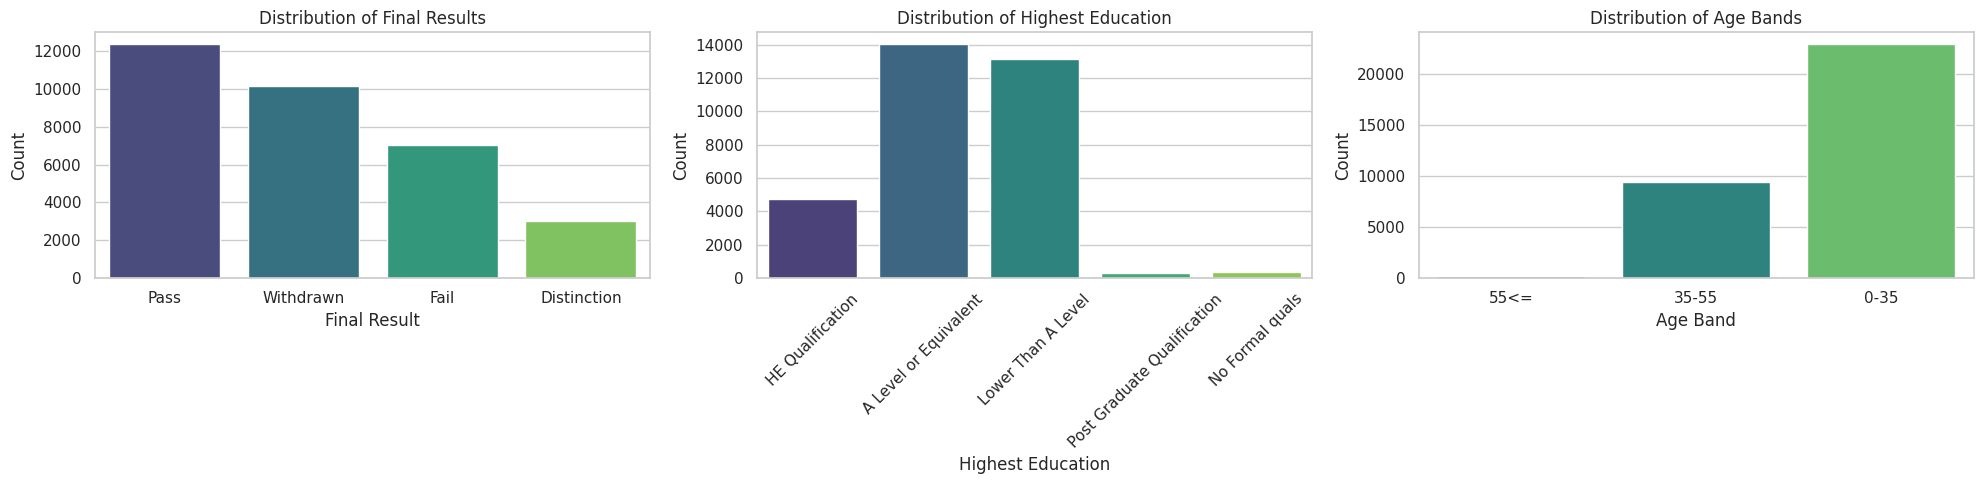

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for final_result
sns.countplot(data=studentinfo, x='final_result', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Final Results')
axes[0].set_xlabel('Final Result')
axes[0].set_ylabel('Count')

# Plot for highest_education
sns.countplot(data=studentinfo, x='highest_education', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Highest Education')
axes[1].set_xlabel('Highest Education')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot for age_band
sns.countplot(data=studentinfo, x='age_band', ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of Age Bands')
axes[2].set_xlabel('Age Band')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

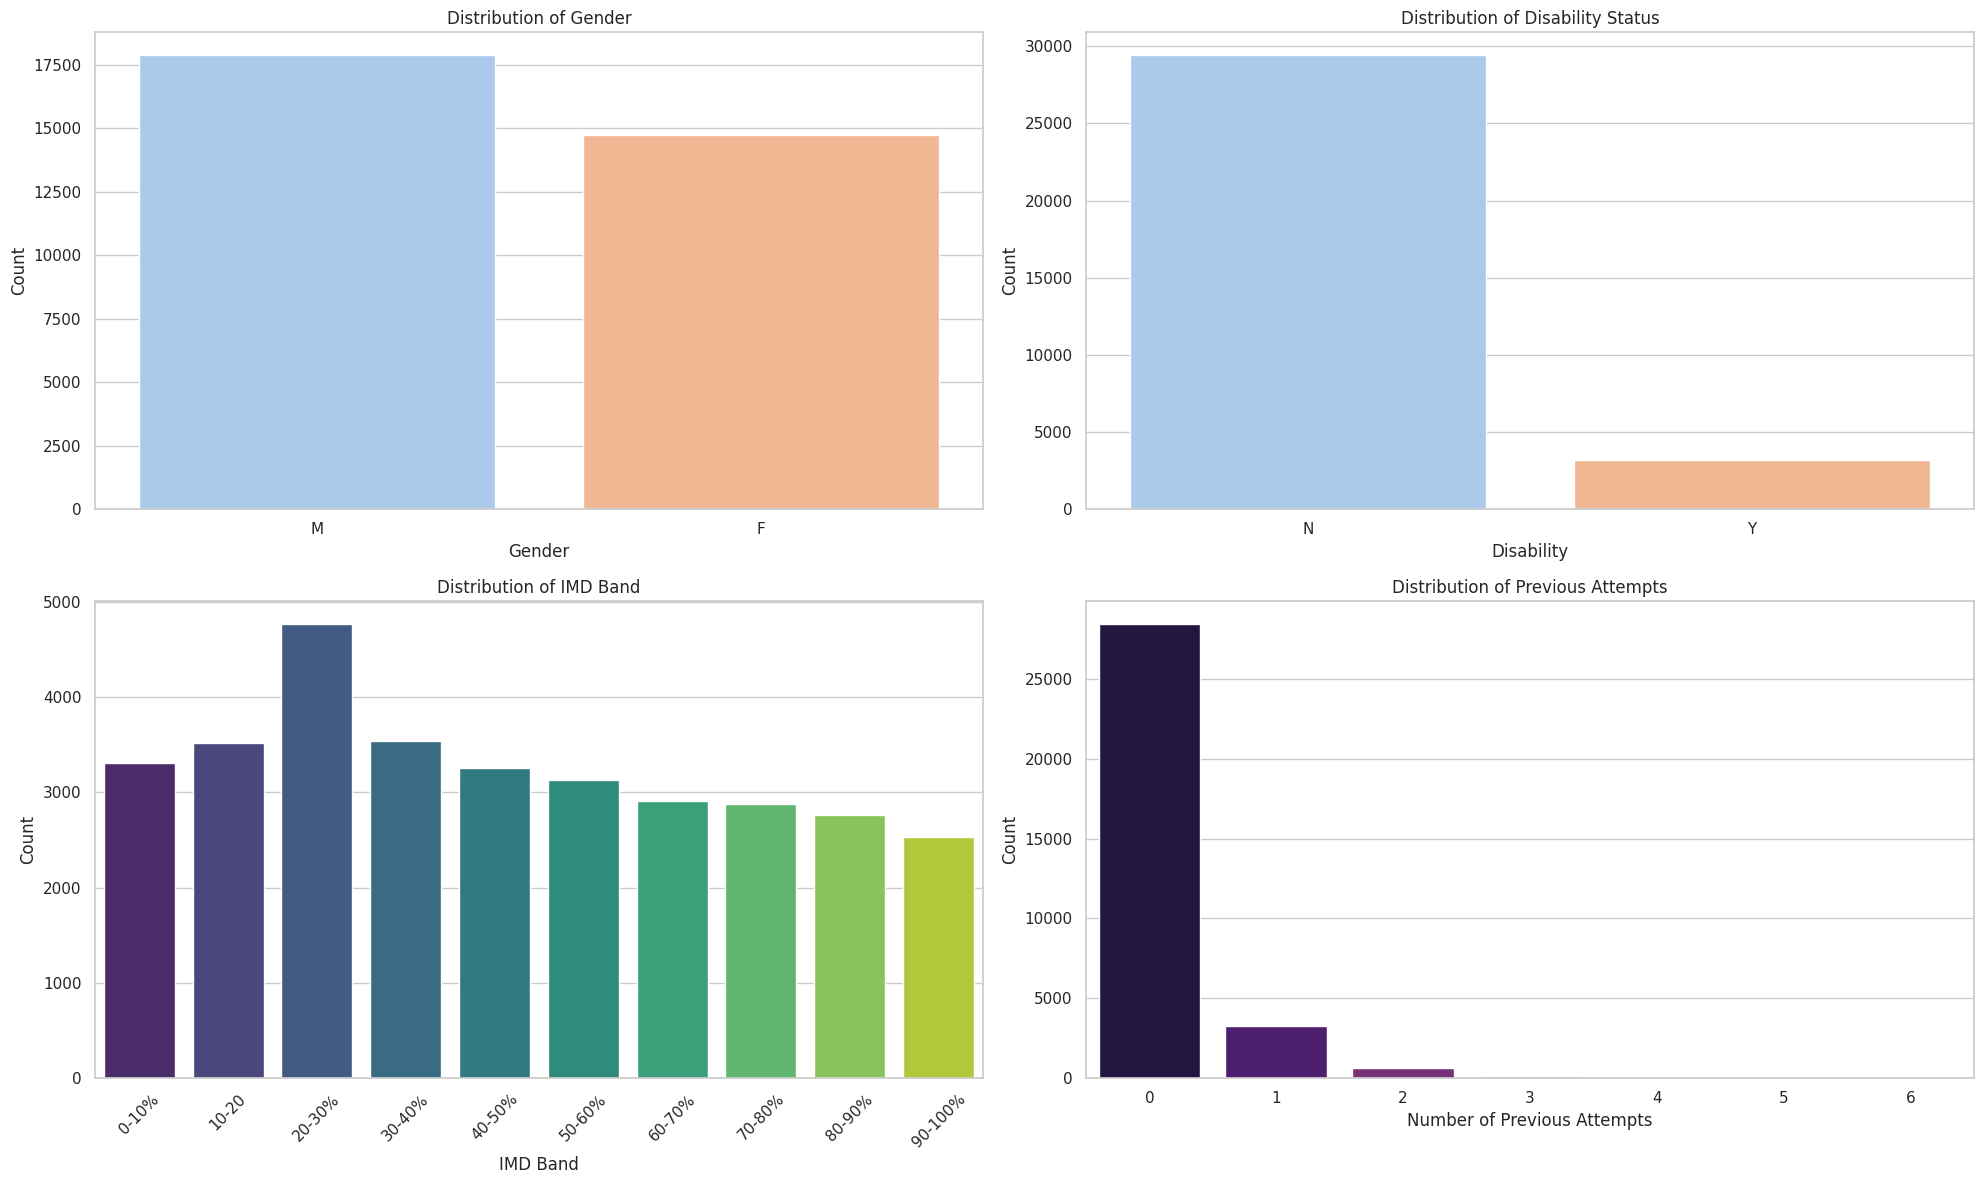

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot for gender
sns.countplot(data=studentinfo, x='gender', ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribution of Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

# Plot for disability
sns.countplot(data=studentinfo, x='disability', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribution of Disability Status')
axes[0, 1].set_xlabel('Disability')
axes[0, 1].set_ylabel('Count')

# Plot for imd_band
# Sorting imd_band to display in logical order
imd_order = sorted(studentinfo['imd_band'].unique().astype(str))
sns.countplot(data=studentinfo, x='imd_band', ax=axes[1, 0], palette='viridis', order=imd_order)
axes[1, 0].set_title('Distribution of IMD Band')
axes[1, 0].set_xlabel('IMD Band')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for num_of_prev_attempts
sns.countplot(data=studentinfo, x='num_of_prev_attempts', ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Distribution of Previous Attempts')
axes[1, 1].set_xlabel('Number of Previous Attempts')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

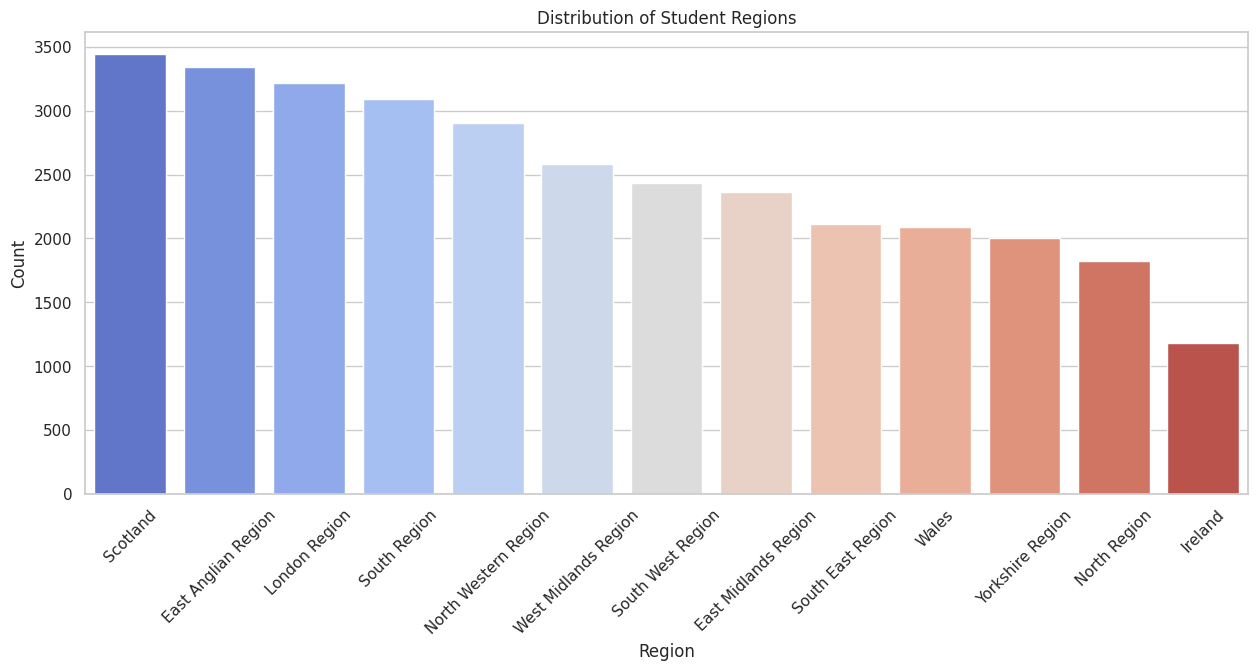

In [144]:
# Plot for Region separately due to many categories
plt.figure(figsize=(15, 6))
sns.countplot(data=studentinfo, x='region', palette='coolwarm', order=studentinfo['region'].value_counts().index)
plt.title('Distribution of Student Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

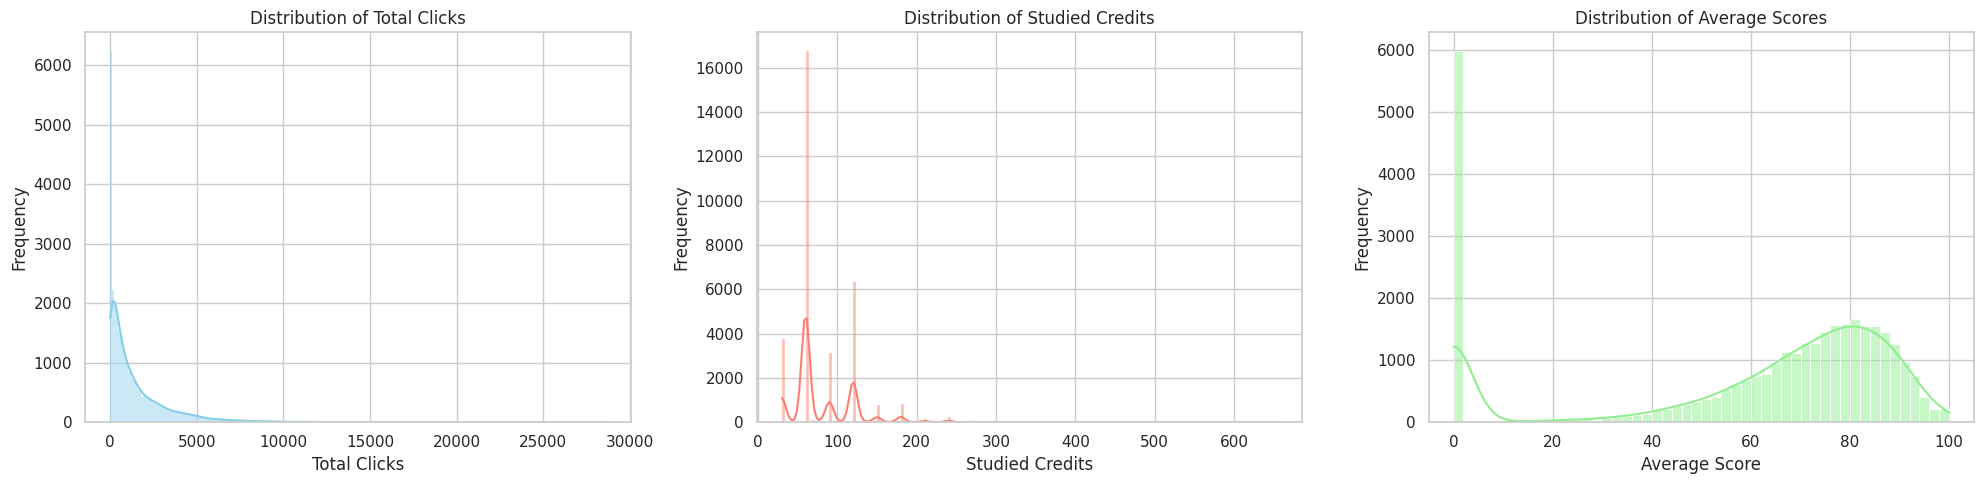

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for total_clicks
sns.histplot(data=studentinfo, x='total_clicks', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Total Clicks')
axes[0].set_xlabel('Total Clicks')
axes[0].set_ylabel('Frequency')

# Plot for studied_credits
sns.histplot(data=studentinfo, x='studied_credits', kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Studied Credits')
axes[1].set_xlabel('Studied Credits')
axes[1].set_ylabel('Frequency')

# Plot for avg_score
sns.histplot(data=studentinfo, x='avg_score', kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Average Scores')
axes[2].set_xlabel('Average Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

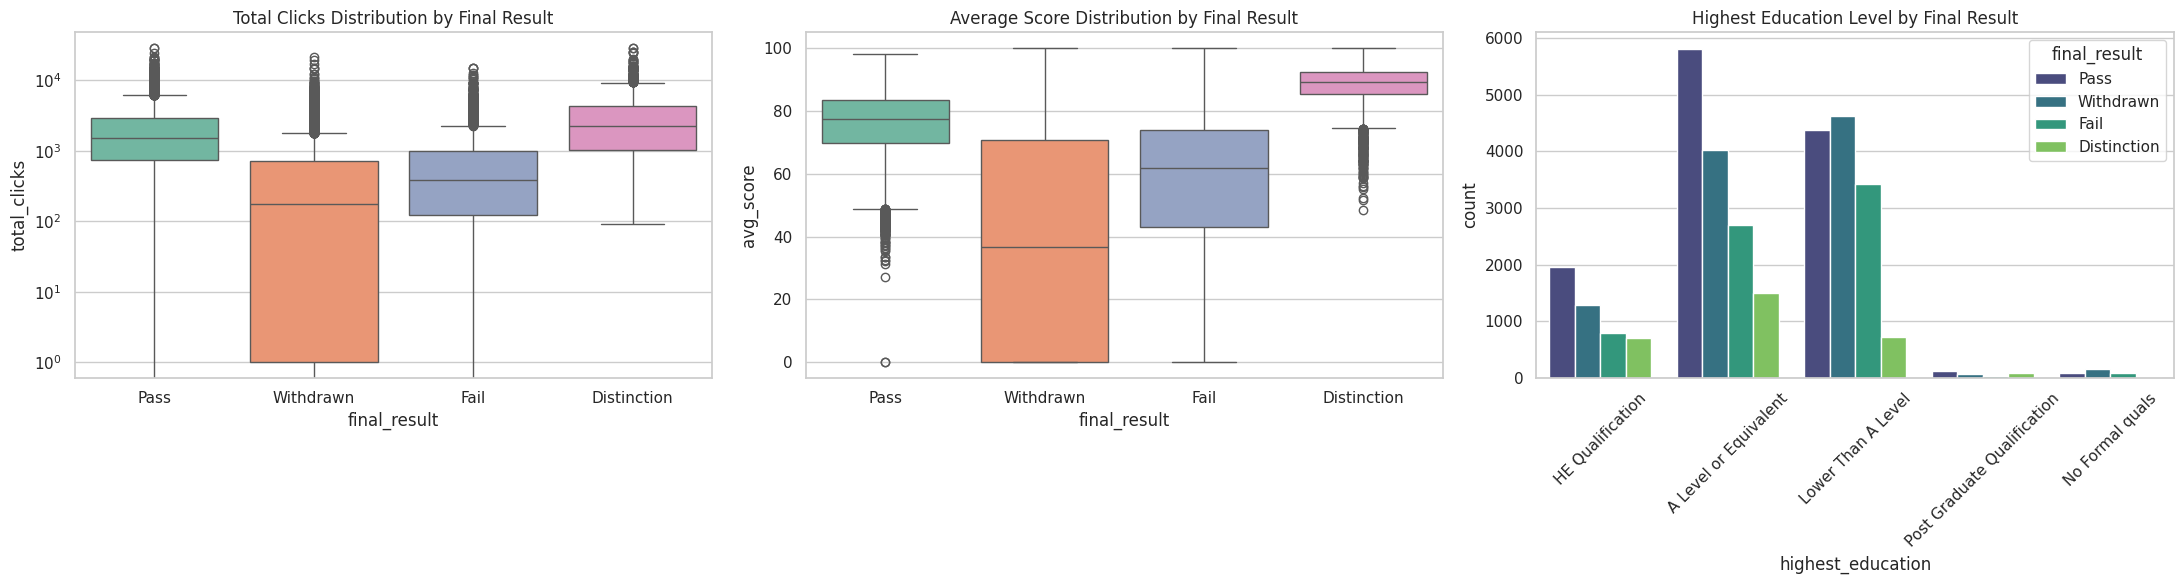


Cross-tabulation of Highest Education and Final Result (Normalized by Row):
final_result                 Distinction      Fail      Pass  Withdrawn
highest_education                                                      
A Level or Equivalent           0.106515  0.192738  0.413813   0.286935
HE Qualification                0.147357  0.167019  0.414376   0.271247
Lower Than A Level              0.055252  0.260374  0.333257   0.351117
No Formal quals                 0.046110  0.273775  0.250720   0.429395
Post Graduate Qualification     0.281150  0.108626  0.373802   0.236422


In [146]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# 1. Box plot of total_clicks by final_result
sns.boxplot(data=studentinfo, x='final_result', y='total_clicks', ax=axes[0], palette='Set2')
axes[0].set_title('Total Clicks Distribution by Final Result')
axes[0].set_yscale('log') # Log scale might be useful for clicks if skewed, but standard boxplot is requested. I'll stick to standard or add log if needed. Given usually skewed nature, log helps but let's stick to raw unless specified.
# Actually, let's keep it linear as per standard request, but maybe limit y if outliers are huge? No, boxplot handles outliers.

# 2. Box plot of avg_score by final_result
sns.boxplot(data=studentinfo, x='final_result', y='avg_score', ax=axes[1], palette='Set2')
axes[1].set_title('Average Score Distribution by Final Result')

# 3. Count plot of highest_education with final_result hue
sns.countplot(data=studentinfo, x='highest_education', hue='final_result', ax=axes[2], palette='viridis')
axes[2].set_title('Highest Education Level by Final Result')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Cross-tabulation
edu_result_ct = pd.crosstab(studentinfo['highest_education'], studentinfo['final_result'], normalize='index')
print("\nCross-tabulation of Highest Education and Final Result (Normalized by Row):")
print(edu_result_ct)

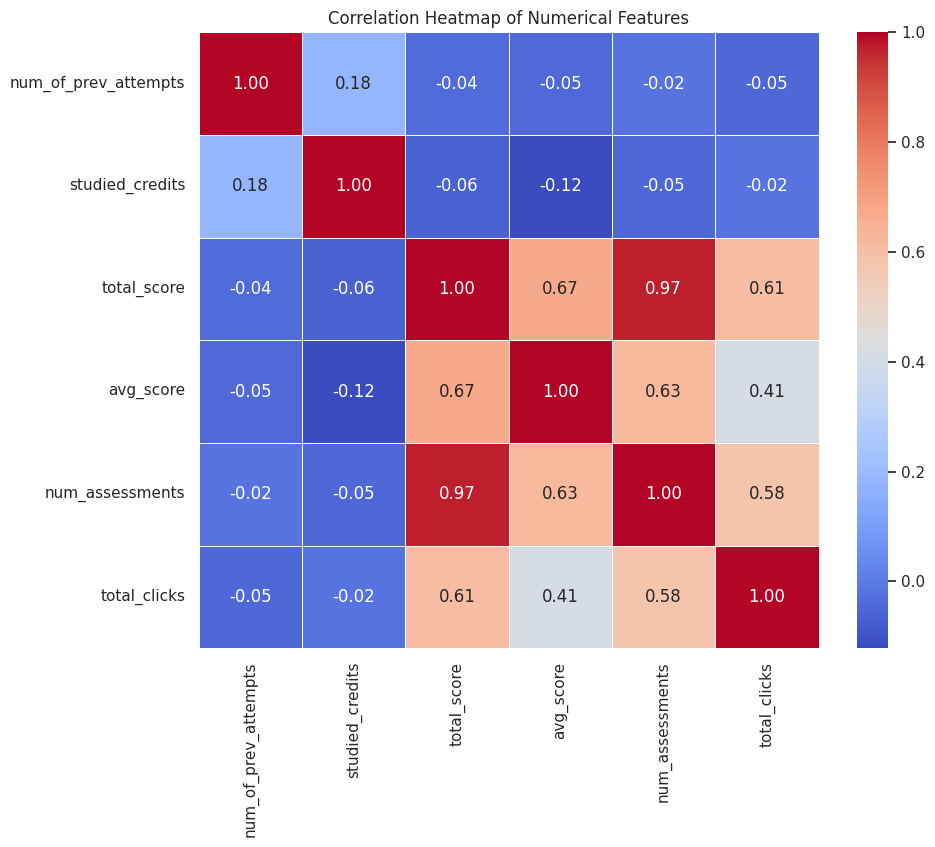

In [147]:
numerical_cols = ['num_of_prev_attempts', 'studied_credits', 'total_score', 'avg_score', 'num_assessments', 'total_clicks']

corr_matrix = studentinfo[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

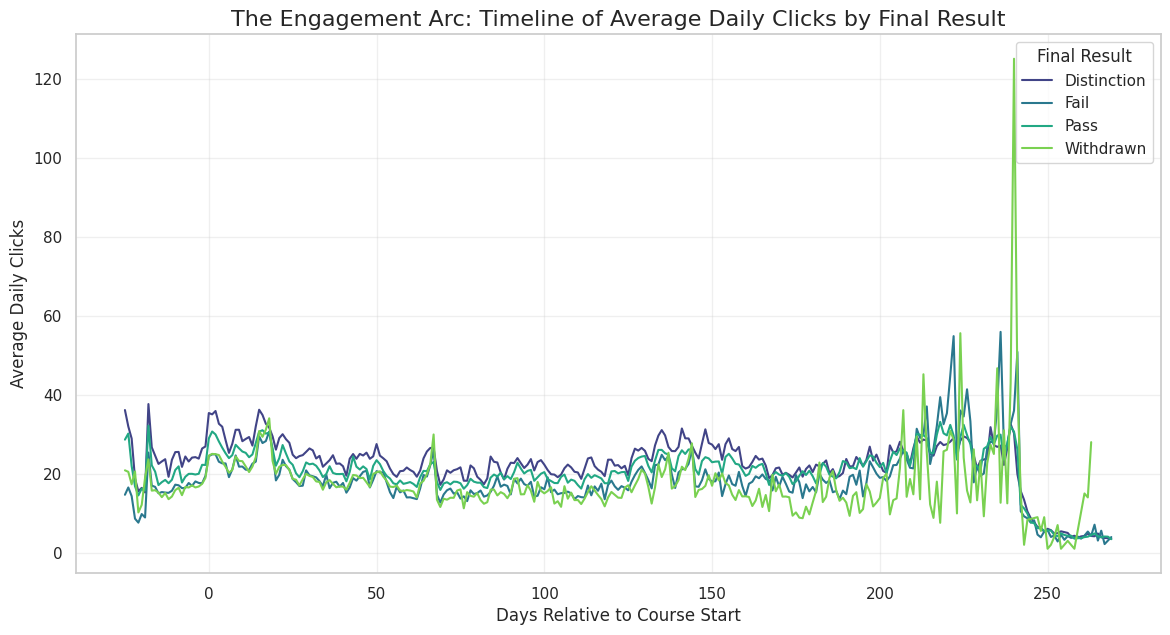

In [148]:
# 1. Aggregate studentvle to calculate total clicks per student per day
daily_student_clicks = studentvle.groupby(['code_module', 'code_presentation', 'id_student', 'date'], as_index=False)['sum_click'].sum()

# 2. Merge with studentinfo to get final_result
# We use a subset of studentinfo to avoid duplicate columns or unnecessary data
merged_clicks = daily_student_clicks.merge(
    studentinfo[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='inner'
)

# 3. Calculate average daily clicks for each final_result group
engagement_arc = merged_clicks.groupby(['final_result', 'date'], as_index=False)['sum_click'].mean()

# 4. Create the visualization
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=engagement_arc,
    x='date',
    y='sum_click',
    hue='final_result',
    palette='viridis'
)

plt.title('The Engagement Arc: Timeline of Average Daily Clicks by Final Result', fontsize=16)
plt.xlabel('Days Relative to Course Start', fontsize=12)
plt.ylabel('Average Daily Clicks', fontsize=12)
plt.legend(title='Final Result')
plt.grid(True, alpha=0.3)
plt.show()

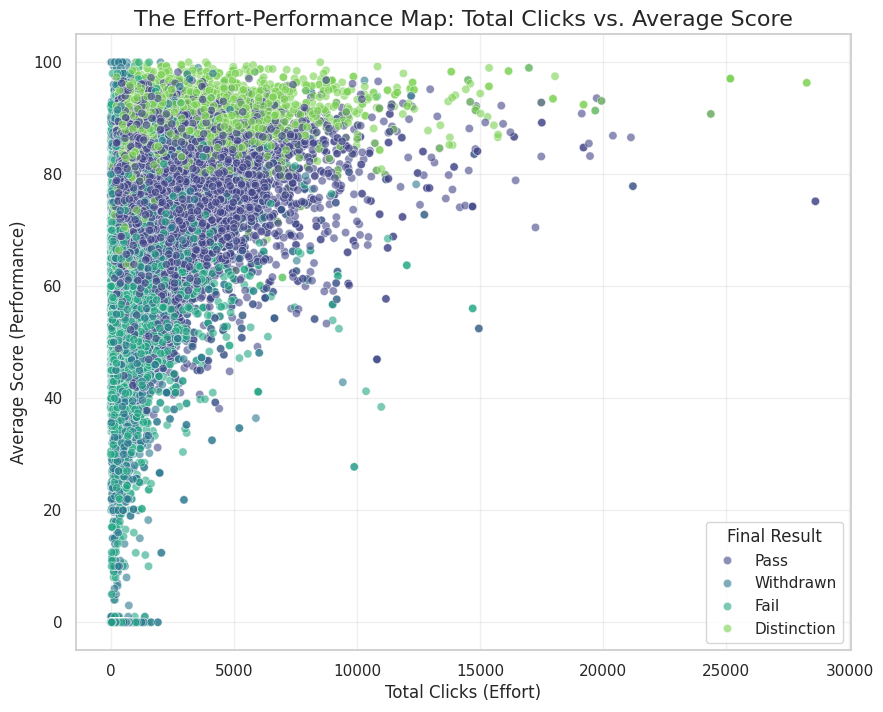

In [149]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=studentinfo,
    x='total_clicks',
    y='avg_score',
    hue='final_result',
    palette='viridis',
    alpha=0.6
)

plt.title('The Effort-Performance Map: Total Clicks vs. Average Score', fontsize=16)
plt.xlabel('Total Clicks (Effort)', fontsize=12)
plt.ylabel('Average Score (Performance)', fontsize=12)
plt.legend(title='Final Result')
plt.grid(True, alpha=0.3)
plt.show()

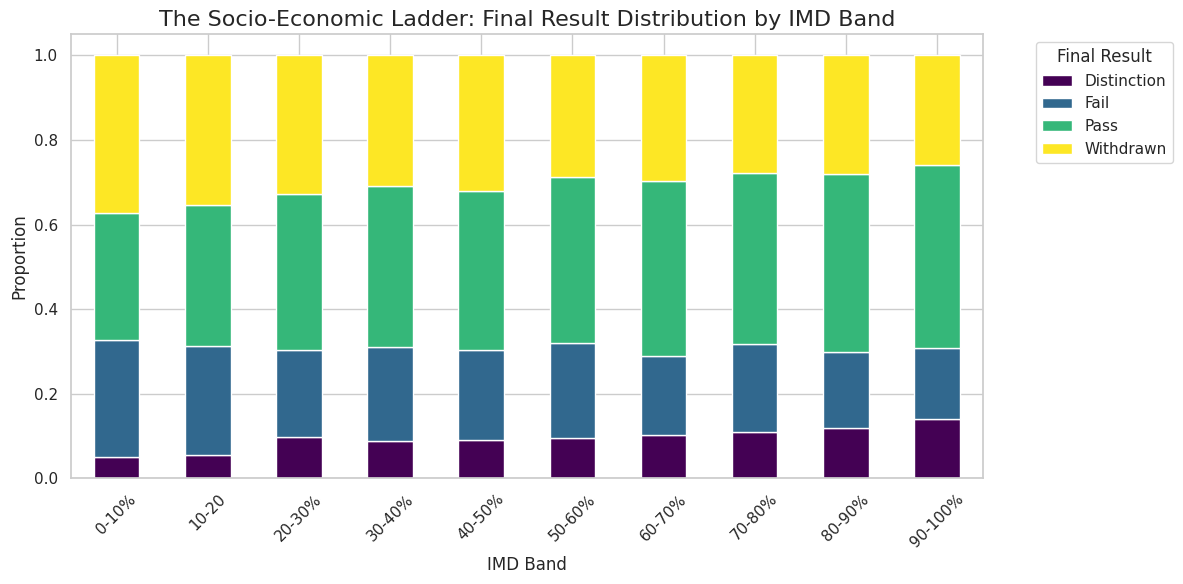

In [150]:
imd_order = ['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Create cross-tabulation normalized by index
imd_result_ct = pd.crosstab(studentinfo['imd_band'], studentinfo['final_result'], normalize='index')

# Reindex to ensure correct order
imd_result_ct = imd_result_ct.reindex(imd_order)

# Plot stacked bar chart
ax = imd_result_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('The Socio-Economic Ladder: Final Result Distribution by IMD Band', fontsize=16)
plt.xlabel('IMD Band', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

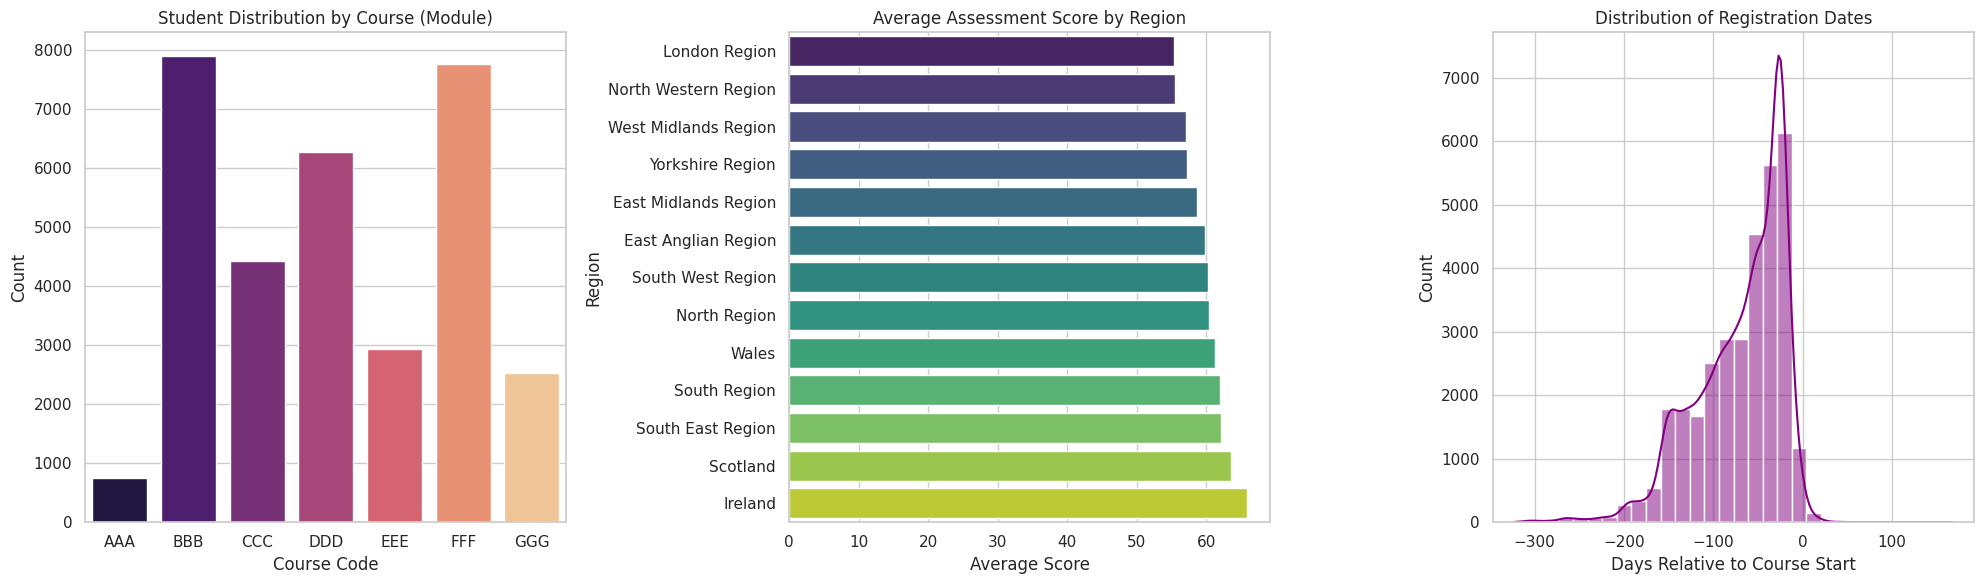

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Count Plot: Code Module (Courses) - REPLACING Final Result Pie Chart
sns.countplot(data=studentinfo, x='code_module', ax=axes[0], palette='magma', order=sorted(studentinfo['code_module'].unique()))
axes[0].set_title('Student Distribution by Course (Module)')
axes[0].set_xlabel('Course Code')
axes[0].set_ylabel('Count')

# 2. Bar Chart: Average Score by Region (Keeping this, as it's new info)
region_scores = studentinfo.groupby('region')['avg_score'].mean().sort_values()
sns.barplot(x=region_scores.values, y=region_scores.index, ax=axes[1], palette='viridis')
axes[1].set_title('Average Assessment Score by Region')
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Region')

# 3. Histogram: Date of Registration (Keeping this, as it's new info)
# (Negative values mean days BEFORE the course starts)
sns.histplot(studentinfo['date_registration'], kde=True, ax=axes[2], color='purple', bins=30)
axes[2].set_title('Distribution of Registration Dates')
axes[2].set_xlabel('Days Relative to Course Start')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

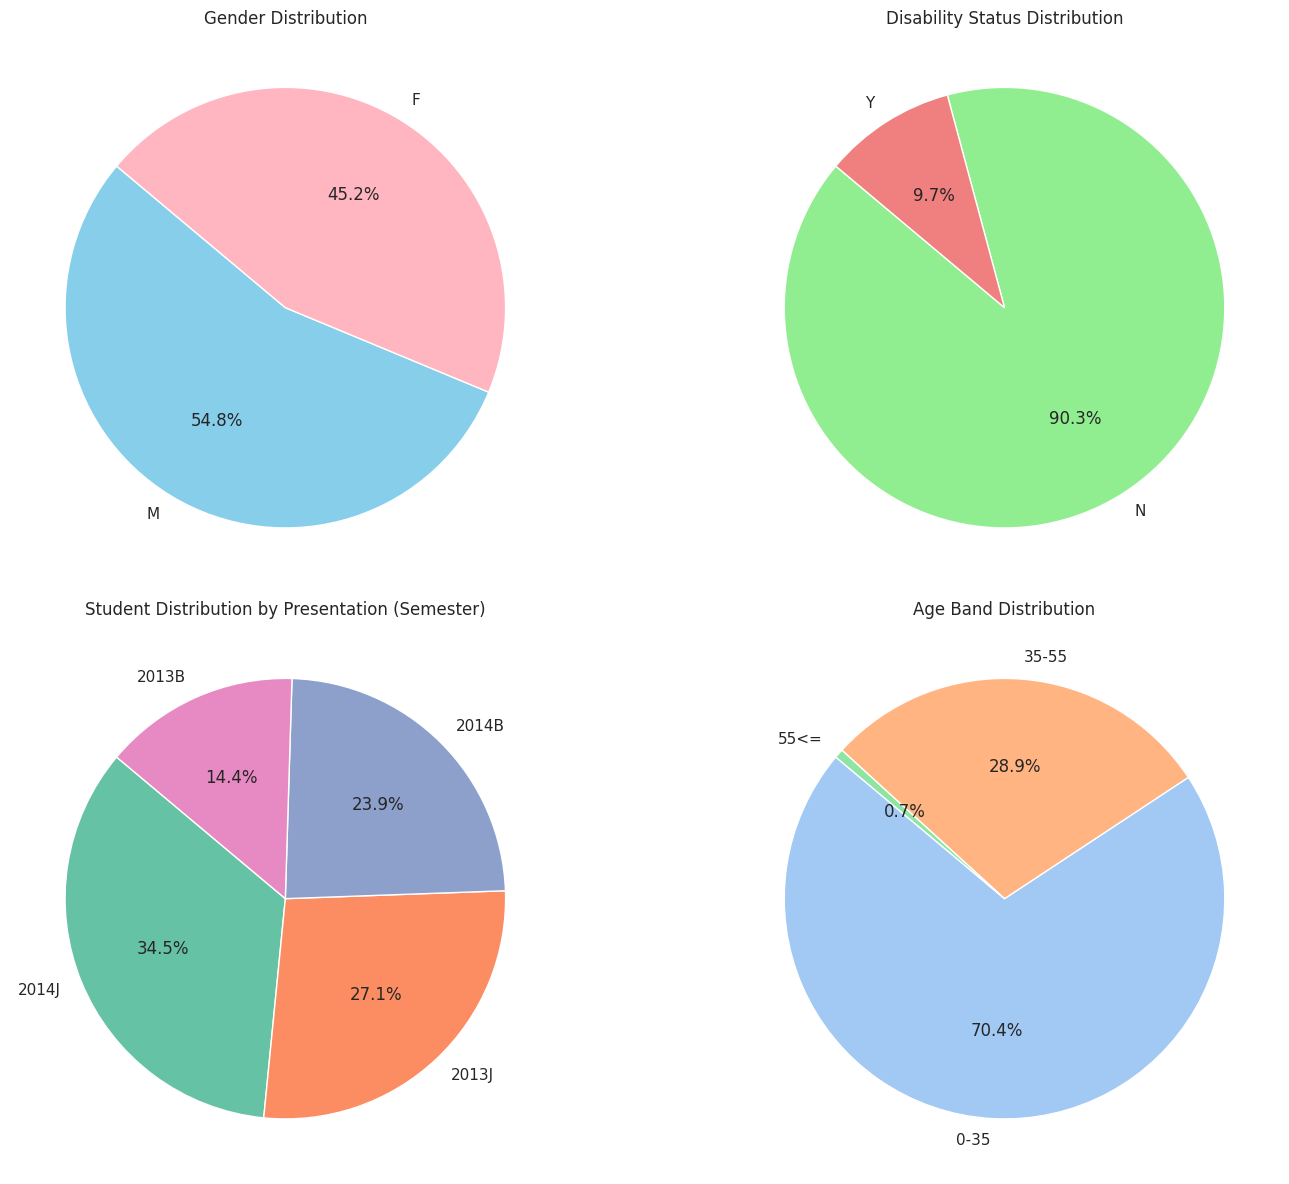

In [152]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie Chart: Gender Distribution
gender_counts = studentinfo['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightpink'])
axes[0, 0].set_title('Gender Distribution')

# 2. Pie Chart: Disability Status Distribution
disability_counts = studentinfo['disability'].value_counts()
axes[0, 1].pie(disability_counts, labels=disability_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('Disability Status Distribution')

# 3. Pie Chart: Code Presentation (Semester) Distribution
presentation_counts = studentinfo['code_presentation'].value_counts()
axes[1, 0].pie(presentation_counts, labels=presentation_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[1, 0].set_title('Student Distribution by Presentation (Semester)')

# 4. Pie Chart: Age Band Distribution
age_counts = studentinfo['age_band'].value_counts()
axes[1, 1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1, 1].set_title('Age Band Distribution')

plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

In [153]:
df['days_before_start'] = df['date_registration'].apply(lambda x: -x)

df['has_withdrawn'] = (df['date_unregistration'] != -1).astype(int)

df['days_until_withdrawal'] = df.apply(
    lambda r: (r['date_unregistration'] - r['date_registration']) if r['date_unregistration'] != -1 else -1,
    axis=1
)

In [154]:
def imd_to_mid(s):
    try:
        if pd.isna(s) or s == 'Unknown':
            return np.nan
        s2 = s.replace('%','')
        if '<=' in s2:
            parts = s2.replace('<=','').split('-')
        else:
            parts = s2.split('-')
        parts = [p for p in parts if p!='']
        if len(parts) == 1:
            return float(parts[0])
        low = float(parts[0])
        high = float(parts[-1])
        return (low + high) / 2.0
    except:
        return np.nan

df['imd_num'] = df['imd_band'].astype(str).apply(imd_to_mid)

df['imd_num'] = df['imd_num'].fillna(df['imd_num'].median())

In [155]:
age_map = {
    '0-35': 17.5,
    '35-55': 45.0,
    '55<=': 60.0
}

df['age_band'] = df['age_band'].astype(str).str.strip()

In [156]:
placeholder_age = (
    df['age_band']
    .str.extract(r'(\d+)')[0]
    .astype(float)
    .fillna(30.0)
)

df['age_num'] = df['age_band'].map(age_map)
df['age_num'] = df['age_num'].fillna(placeholder_age)

In [157]:
edu_map = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Postgraduate Qualification': 4
}
df['edu_level'] = df['highest_education'].map(edu_map).fillna(
    df['highest_education'].mode().iloc[0]
)
df['edu_level'] = pd.to_numeric(df['edu_level'], errors='coerce').fillna(2).astype(int)

In [158]:
df['gender_m'] = df['gender'].map({'M': 1, 'F': 0}).fillna(0).astype(int)
df['disability_flag'] = df['disability'].map({'Y': 1, 'N': 0}).fillna(0).astype(int)

In [159]:
df['clicks_per_credit'] = df.apply(
    lambda r: r['total_clicks'] / r['studied_credits'] if r['studied_credits'] > 0 else 0,
    axis=1
)

In [160]:
df['score_per_assess'] = df.apply(
    lambda r: r['total_score'] / r['num_assessments'] if r['num_assessments'] > 0 else 0,
    axis=1
)

In [161]:
model_cols = [
    'code_module', 'code_presentation', 'id_student', 'gender_m', 'region', 'edu_level', 'imd_num', 'age_num',
    'num_of_prev_attempts', 'studied_credits', 'disability_flag',
    'total_score', 'avg_score', 'num_assessments', 'total_clicks',
    'days_before_start', 'has_withdrawn', 'days_until_withdrawal',
    'clicks_per_credit', 'score_per_assess',
    'target_pass'
]

In [162]:
modeling_df = df[model_cols].copy()

In [163]:
num_cols = modeling_df.select_dtypes(include=[np.number]).columns.tolist()
modeling_df[num_cols] = modeling_df[num_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

In [164]:
print("Modeling dataframe shape:", modeling_df.shape)
print("\nDtypes:")
print(modeling_df.dtypes)
print("\nFirst 8 rows:")
print(modeling_df.head(8))
print("\nSummary statistics (numeric):")
print(modeling_df.describe().T)

Modeling dataframe shape: (32593, 21)

Dtypes:
code_module               object
code_presentation         object
id_student                 int64
gender_m                   int64
region                    object
edu_level                  int64
imd_num                  float64
age_num                  float64
num_of_prev_attempts       int64
studied_credits            int64
disability_flag            int64
total_score              float64
avg_score                float64
num_assessments          float64
total_clicks             float64
days_before_start        float64
has_withdrawn              int64
days_until_withdrawal    float64
clicks_per_credit        float64
score_per_assess         float64
target_pass                int64
dtype: object

First 8 rows:
  code_module code_presentation  id_student  gender_m                region  \
0         AAA             2013J       11391         1   East Anglian Region   
1         AAA             2013J       28400         0              Scotla

In [165]:
# Check Class Balance
result_counts = df['final_result'].value_counts()
result_percentages = df['final_result'].value_counts(normalize=True) * 100

balance_df = pd.DataFrame({'Count': result_counts, 'Percentage': result_percentages})
display(balance_df)

# Check binary balance (Pass/Distinction vs Fail/Withdrawn)
df['binary_target'] = df['final_result'].map({'Pass': 1, 'Distinction': 1, 'Fail': 0, 'Withdrawn': 0})
binary_counts = df['binary_target'].value_counts(normalize=True) * 100
print("\nBinary Target Balance (1=Pass/Distinction, 0=Fail/Withdrawn):")
print(binary_counts)

,Count,Percentage
final_result,,
Pass,12361,37.925321
Withdrawn,10156,31.160065
Fail,7052,21.636548
Distinction,3024,9.278066



Binary Target Balance (1=Pass/Distinction, 0=Fail/Withdrawn):
binary_target
0    52.796613
1    47.203387
Name: proportion, dtype: float64


# ENCODE CATEGORICAL COLUMNS

In [166]:
non_numeric_cols = modeling_df.select_dtypes(include=['object']).columns
non_numeric_cols

Index(['code_module', 'code_presentation', 'region'], dtype='object')

In [167]:
for col in non_numeric_cols:
    print(col, modeling_df[col].unique()[:20])

code_module ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation ['2013J' '2014J' '2013B' '2014B']
region ['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']


In [168]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns that must be numeric
cat_cols = ['code_module', 'code_presentation', 'region']

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    modeling_df[col] = le.fit_transform(modeling_df[col].astype(str))
    label_encoders[col] = le
    print(f"{col} encoded. Classes: {list(le.classes_)}")

# Recreate feature matrix and targets
feature_cols = [
    col for col in modeling_df.columns
    if col not in ['target_pass', 'id_student']
]

X = modeling_df[feature_cols]
y_class = modeling_df['target_pass']

print("\nRemaining non-numeric columns:",
      X.select_dtypes(include='object').columns.tolist())

print("All features are now numeric. Ready for modeling.")

code_module encoded. Classes: ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']
code_presentation encoded. Classes: ['2013B', '2013J', '2014B', '2014J']
region encoded. Classes: ['East Anglian Region', 'East Midlands Region', 'Ireland', 'London Region', 'North Region', 'North Western Region', 'Scotland', 'South East Region', 'South Region', 'South West Region', 'Wales', 'West Midlands Region', 'Yorkshire Region']

Remaining non-numeric columns: []
All features are now numeric. Ready for modeling.


# TRAIN–TEST SPLIT FOR CLASSIFICATION

In [169]:
# Build X
feature_cols = [
    col for col in modeling_df.columns
    if col not in ['target_pass', 'id_student']
]

X = modeling_df[feature_cols]

In [170]:
# Targets
y_class = modeling_df['target_pass']

In [171]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [172]:
print("Classification shapes:", X_train.shape, y_train.shape)

Classification shapes: (26074, 19) (26074,)


In [173]:
y_train.head()

,target_pass
28256,0
12406,0
30923,1
5559,0
5170,1


# MODEL SELECTION AND PERFORMANCE COMPARISON

Random Forest Metrics:
Accuracy:    0.9238
Precision:   0.8940
Recall:      0.9513 (Sensitivity)
F1-Score:    0.9217
Specificity: 0.8992


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3442
           1       0.89      0.95      0.92      3077

    accuracy                           0.92      6519
   macro avg       0.92      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



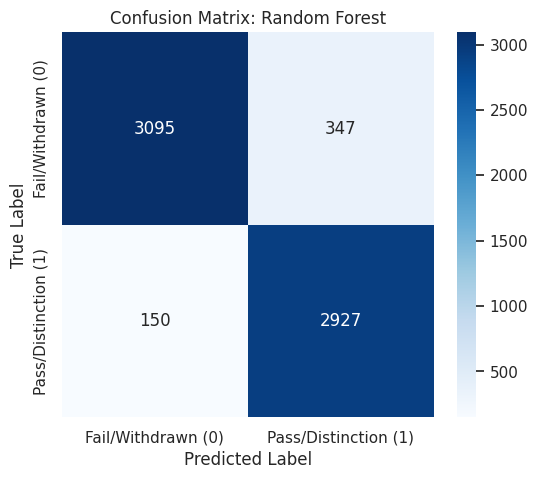

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Calculate Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix & Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = rec  # Recall is sensitivity

# Print Metrics
print(f"Random Forest Metrics:")
print(f"Accuracy:    {acc:.4f}")
print(f"Precision:   {prec:.4f}")
print(f"Recall:      {rec:.4f} (Sensitivity)")
print(f"F1-Score:    {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Random Forest')
plt.show()

Decision Trees Metrics:
Accuracy:    0.8912
Precision:                 0.8955
Recall (Sensitivity):      0.8713
F1-Score:                  0.8832
Specificity:               0.9091


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3442
           1       0.90      0.87      0.88      3077

    accuracy                           0.89      6519
   macro avg       0.89      0.89      0.89      6519
weighted avg       0.89      0.89      0.89      6519



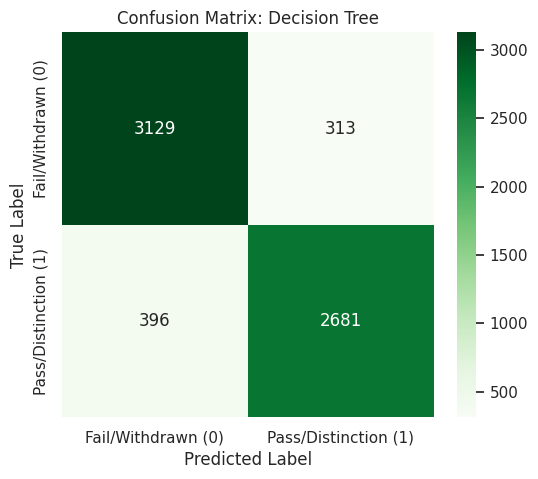

In [175]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Calculate Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Confusion Matrix & Specificity
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
specificity_dt = tn / (tn + fp)
sensitivity_dt = rec_dt

# Print Metrics
print(f"Decision Trees Metrics:")
print(f"Accuracy:    {acc_dt:.4f}")
print(f"Precision:                 {prec_dt:.4f}")
print(f"Recall (Sensitivity):      {rec_dt:.4f}")
print(f"F1-Score:                  {f1_dt:.4f}")
print(f"Specificity:               {specificity_dt:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

XGBoost Metrics:
Accuracy:                  0.9271
Precision:                 0.8988
Recall (Sensitivity):      0.9529
F1-Score:                  0.9251
Specificity:               0.9041


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3442
           1       0.90      0.95      0.93      3077

    accuracy                           0.93      6519
   macro avg       0.93      0.93      0.93      6519
weighted avg       0.93      0.93      0.93      6519



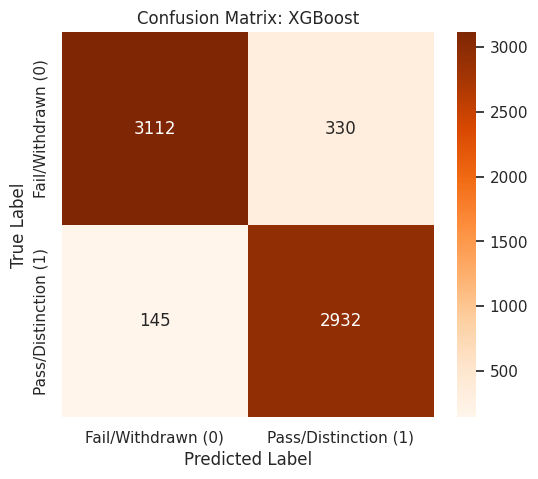

In [176]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Confusion Matrix & Specificity
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = cm_xgb.ravel()
specificity_xgb = tn / (tn + fp)
sensitivity_xgb = rec_xgb

# Print Metrics
print(f"XGBoost Metrics:")
print(f"Accuracy:                  {acc_xgb:.4f}")
print(f"Precision:                 {prec_xgb:.4f}")
print(f"Recall (Sensitivity):      {rec_xgb:.4f}")
print(f"F1-Score:                  {f1_xgb:.4f}")
print(f"Specificity:               {specificity_xgb:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred_xgb))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: XGBoost')
plt.show()

SVM (Linear) Metrics:
Accuracy:                  0.8957
Precision:                 0.8644
Recall (Sensitivity):      0.9240
F1-Score:                  0.8932
Specificity:               0.8704


              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3442
           1       0.86      0.92      0.89      3077

    accuracy                           0.90      6519
   macro avg       0.90      0.90      0.90      6519
weighted avg       0.90      0.90      0.90      6519



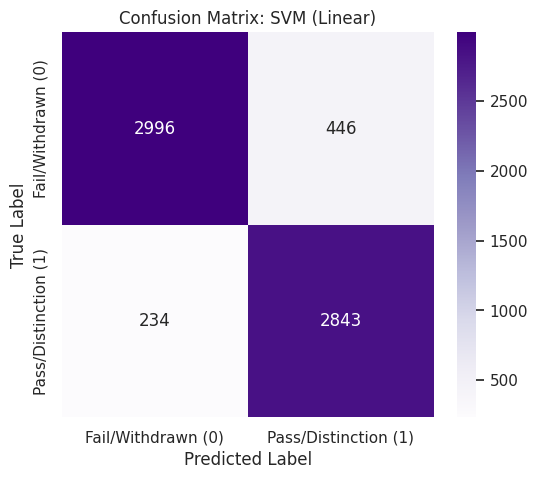

In [177]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train SVM (LinearSVC) with Scaling
# SVM requires feature scaling for optimal performance, unlike tree-based models
svm_model = make_pipeline(StandardScaler(), LinearSVC(random_state=42, dual=False))
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Calculate Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Confusion Matrix & Specificity
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
specificity_svm = tn / (tn + fp)
sensitivity_svm = rec_svm

# Print Metrics
print(f"SVM (Linear) Metrics:")
print(f"Accuracy:                  {acc_svm:.4f}")
print(f"Precision:                 {prec_svm:.4f}")
print(f"Recall (Sensitivity):      {rec_svm:.4f}")
print(f"F1-Score:                  {f1_svm:.4f}")
print(f"Specificity:               {specificity_svm:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred_svm))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: SVM (Linear)')
plt.show()

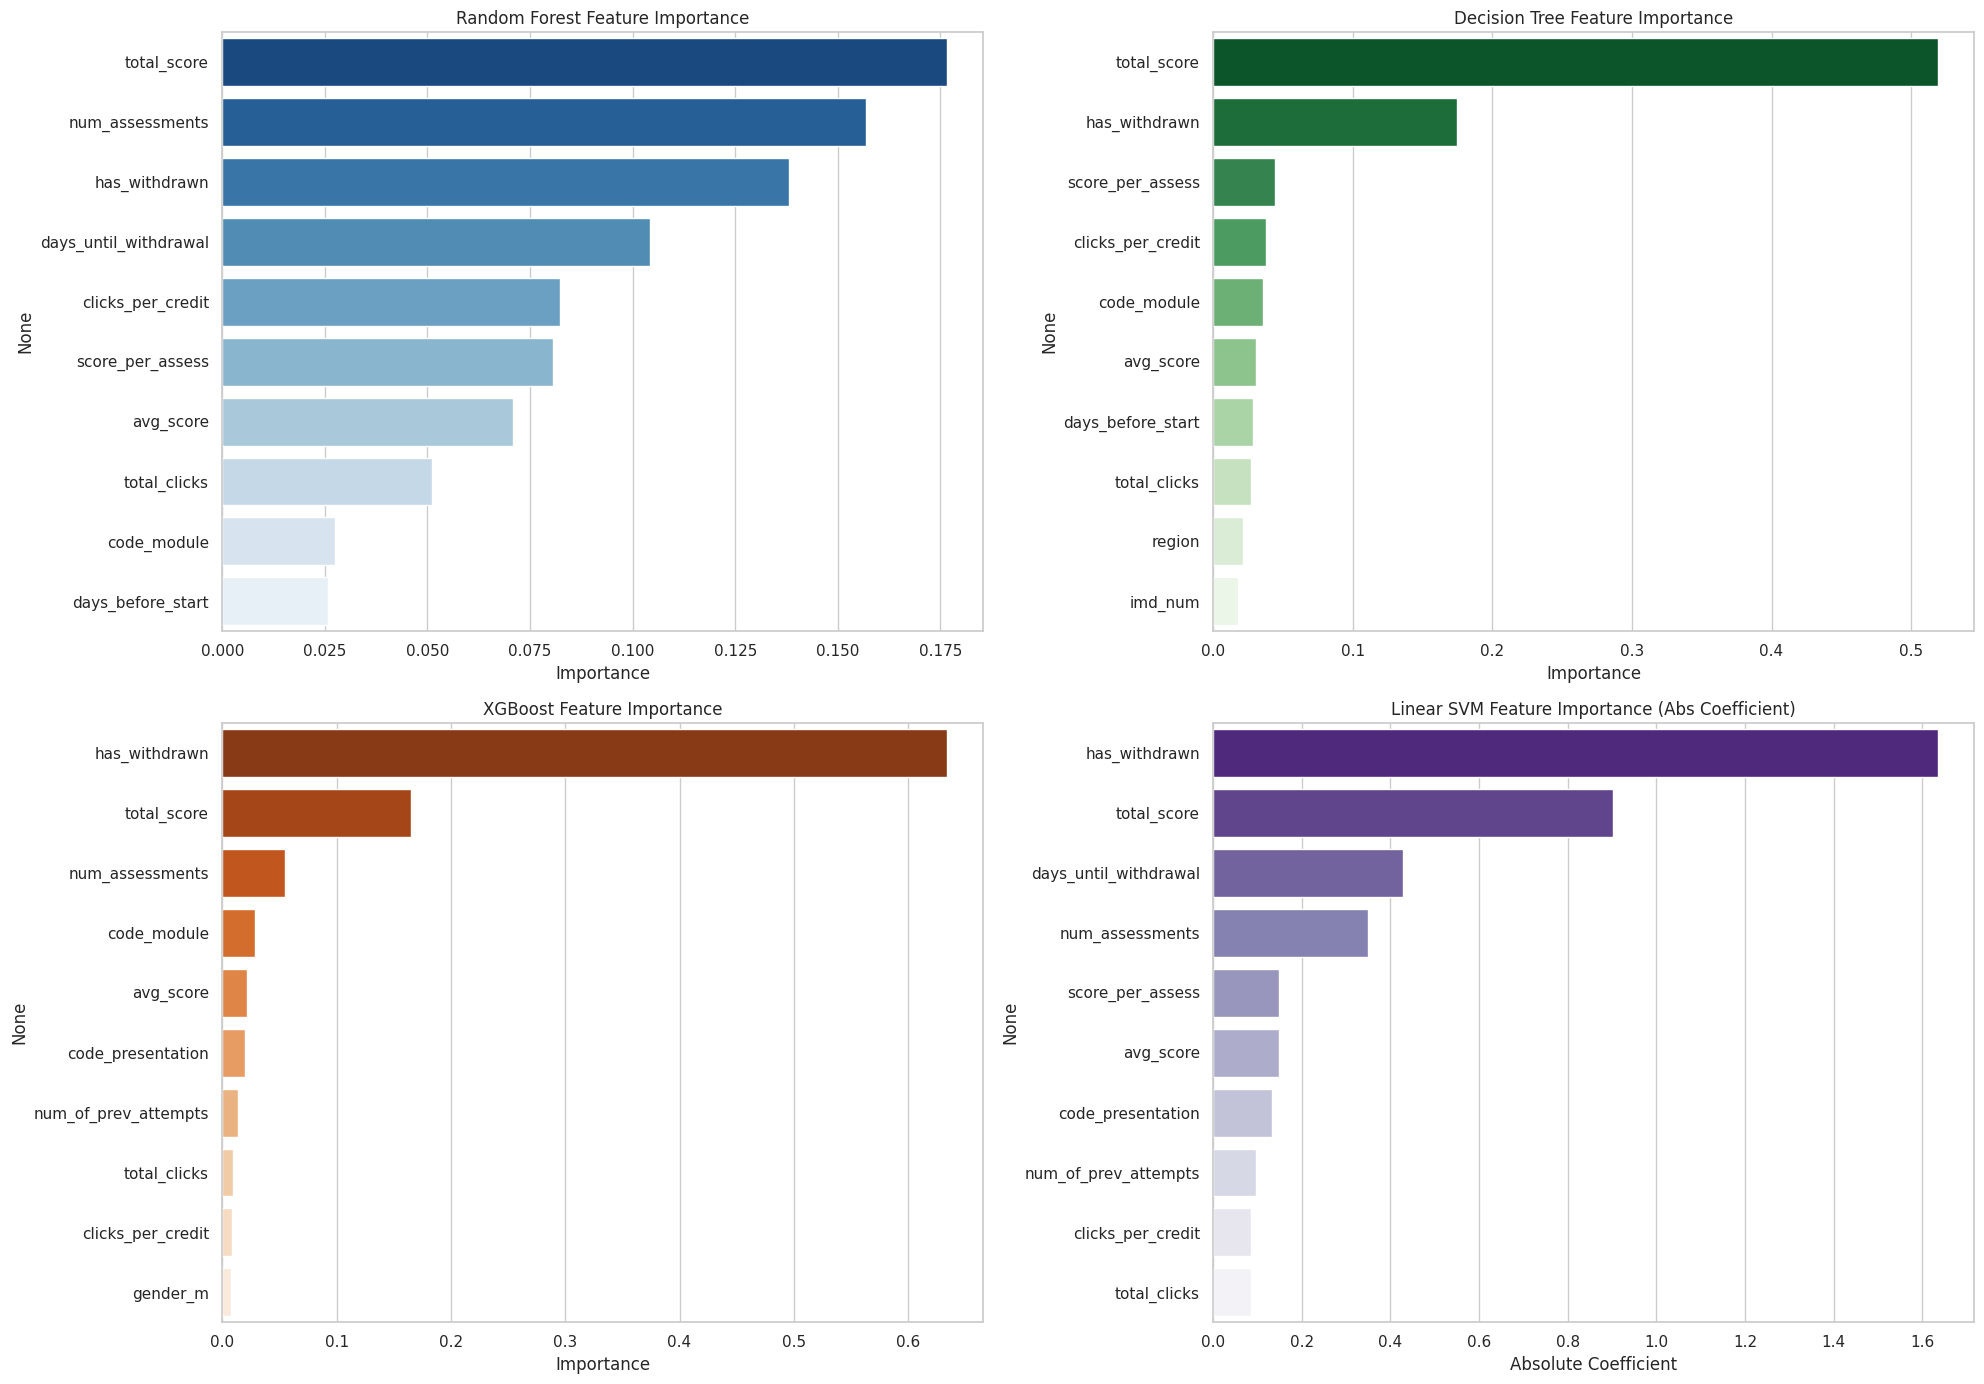

In [178]:
feature_names = X_train.columns

# Helper function to get top features
def get_top_features(importances, names, top_n=10):
    indices = np.argsort(importances)[::-1][:top_n]
    return names[indices], importances[indices]

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

# 1. Random Forest
rf_importances = rf_model.feature_importances_
top_feat_rf, top_imp_rf = get_top_features(rf_importances, feature_names)
sns.barplot(x=top_imp_rf, y=top_feat_rf, ax=axes[0], palette='Blues_r')
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance')

# 2. Decision Tree
dt_importances = dt_model.feature_importances_
top_feat_dt, top_imp_dt = get_top_features(dt_importances, feature_names)
sns.barplot(x=top_imp_dt, y=top_feat_dt, ax=axes[1], palette='Greens_r')
axes[1].set_title('Decision Tree Feature Importance')
axes[1].set_xlabel('Importance')

# 3. XGBoost
xgb_importances = xgb_model.feature_importances_
top_feat_xgb, top_imp_xgb = get_top_features(xgb_importances, feature_names)
sns.barplot(x=top_imp_xgb, y=top_feat_xgb, ax=axes[2], palette='Oranges_r')
axes[2].set_title('XGBoost Feature Importance')
axes[2].set_xlabel('Importance')

# 4. Linear SVM (Coefficients)
# Accessing the LinearSVC step from the pipeline
svm_coef = np.abs(svm_model[-1].coef_[0]) # Taking absolute value for importance
top_feat_svm, top_imp_svm = get_top_features(svm_coef, feature_names)
sns.barplot(x=top_imp_svm, y=top_feat_svm, ax=axes[3], palette='Purples_r')
axes[3].set_title('Linear SVM Feature Importance (Abs Coefficient)')
axes[3].set_xlabel('Absolute Coefficient')

plt.tight_layout()
plt.show()